In [1]:
import matplotlib.pyplot as plt
from AC_class import AlmgrenChrissEnv

import numpy as np
from data_gen_func import *

In [23]:
# Parameters
N = 10                          # Number of time intervals
X = 1e3                         # Total shares to sell
T = 10                          # Trading horizon
tau = T / N                     # Length of each interval

s = 0.0625                      # Spread cost per share
eta = 2.5e-03                   # Temporary impact coefficient
gamma = 1.2e-3                 # Permanent impact parameter
sigma = 0.95                     # Volatility
env = AlmgrenChrissEnv(X0 = X, N=N, T=T, sigma=sigma, param_temporary_impact = (s, eta), param_permanent_impact = gamma)
fn_strategy = random_liquidation_strategy

trading_rate_list, trading_cost_list, price_change_list = data_gen(env,fn_strategy, 5000)

df = pd.DataFrame({
        'Trading Rate': trading_rate_list,
        'Trading Cost': trading_cost_list,
        'Price Change': price_change_list
    })


/nfs/home/colinn/miniconda3/envs/myenv/lib/python3.11/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


In [24]:
def bayes_parameters(x,y, prior_mean = 3e-03, weight_prior=1, noise_prior=0.95):
    #priors
    #weight_variance # increase means increased uncertainty about the weights
    #noise_variance  # increase means increased uncertainty about the noise

    # solve for matrix A and B based on C24 tute sheet
    A = (1/noise_prior)*(x.T @ x)+ (np.eye(x.shape[1])/weight_prior)
    b = (1/noise_prior)*(x.T@y) + (np.eye(x.shape[1])/weight_prior)*prior_mean

    #posterior cov and mean
    cov = np.linalg.inv(A)
    mean = cov@b

    return cov, mean

In [38]:
df.to_csv('AC_model_data1.2.csv')

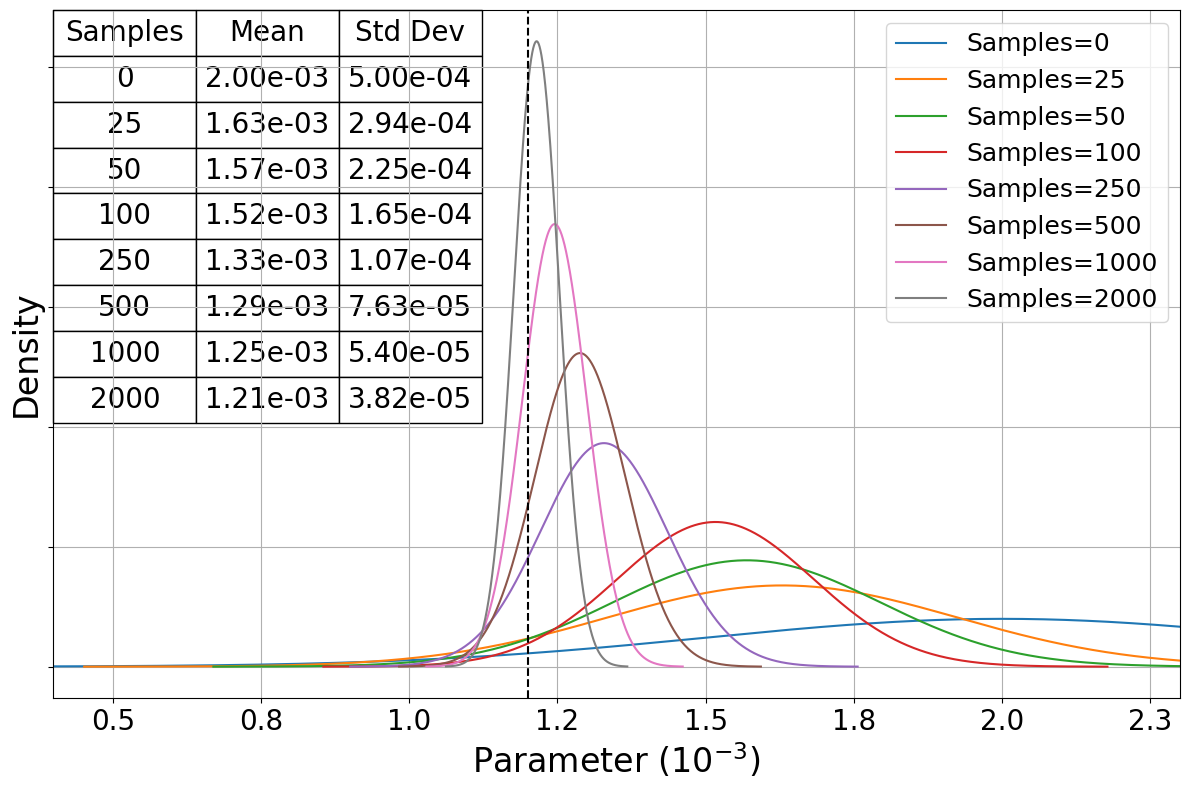

In [111]:
from scipy.stats import norm 
import matplotlib.ticker as ticker
# Sample sizes to itte over
for seed in range(50,51):
    samples = [0,25, 50, 100, 250, 500,1000, 2000]
    # Prepare lists to store table data and to plot curves
    table_data = []
    prior_data = []
    plt.figure(figsize=(12, 8))
    for i in samples:
        # Compute your values (replace these function calls with your actual functions)
        x1, y1 = price_change(extract(df, i, uniform=1, seed =seed))
        cov, mean = bayes_parameters(x1, y1,  prior_mean = 2e-03, weight_prior=25e-08)
        
        std = np.sqrt(cov[0, 0])
        mu = mean[0, 0]
        
        # Save the mean and standard deviation for the table (formatted as desired)
        table_data.append([i, f"{mu:.2e}", f"{std:.2e}"])
        prior_data.append([i, mu, std])
        # Plot the probability density function
        x = np.linspace(mu - 4 * std, mu + 4 * std, 1000)
        pdf = norm.pdf(x, mu, std)
        plt.plot(x, pdf, label=f'Samples={i}')

    # Customize the plot
    plt.xlabel('Parameter')
    plt.ylabel('Density')
    center = 1.2e-3
    plt.xlim(center - 0.0008, center + 0.0011)
    plt.grid(True)
    plt.axvline(x=1.2e-3, linestyle='--', color='black')
    plt.legend(loc="upper right")
    plt.xlabel("Parameter ($10^{-3}$)", fontsize=n)
    plt.ylabel('Density', fontsize = n)
    plt.legend(loc = "best", fontsize = n-6)
    plt.tick_params(axis="both", which="both",labelleft =False, labelsize=n-4)
    plt.grid(True)
    ax = plt.gca()
    #ax.set_yticks([])
    ax.xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f"{x*1e3:.1f}")
    )
    # Create a table and add it to the top left of the figure
    column_labels = ["Samples", "Mean", "Std Dev"]
    tbl = plt.table(cellText=table_data,
            colLabels=column_labels,
            loc='upper left',
            colLoc='center',
            cellLoc='center',
            fontsize = n+10,
            bbox=[0.0, 0.4, 0.38, 0.6])  # Adjust bbox as needed

    # turn off auto‐resize (so your font size sticks)
    tbl.auto_set_font_size(False)

    # set the font size (e.g. make it n-2 instead of n-4)
    tbl.set_fontsize(n-4)
    plt.tight_layout()
    plt.savefig("Closed_posterior.pdf", bbox_inches = 'tight', pad_inches = 0.05)


In [40]:
prior_data

[[0, np.float64(0.002), np.float64(0.0005)],
 [25, np.float64(0.0016293829116772708), np.float64(0.0002943803649780415)],
 [50, np.float64(0.001569104743699898), np.float64(0.00022482947551412527)],
 [100, np.float64(0.0015164933480657035), np.float64(0.00016528874296594702)],
 [250, np.float64(0.00132846321565979), np.float64(0.00010698126385505102)],
 [500, np.float64(0.0012881211500259326), np.float64(7.626006166654792e-05)],
 [1000, np.float64(0.001245230720016704), np.float64(5.4031061780004254e-05)],
 [2000, np.float64(0.0012149063542050312), np.float64(3.823744274040288e-05)]]

In [121]:
import os
import pickle
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1. Load the results ------------------------------------------------
# ------------------------------------------------------------------
results_dir  = "particle count"
pickle_file  = "/nfs/home/colinn/Report_AC_Bayes/Log_prior/Log_prior.pkl"

with open(pickle_file, "rb") as f:
    log_results = pickle.load(f)

In [126]:
import os
import pickle
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1. Load the results ------------------------------------------------
# ------------------------------------------------------------------
results_dir  = "particle count"
pickle_file  = "/nfs/home/colinn/Report_AC_Bayes/closed_form_prior_quick/closed_form_prior.pkl"

with open(pickle_file, "rb") as f:
    delta_results = pickle.load(f)

In [127]:
import numpy as np

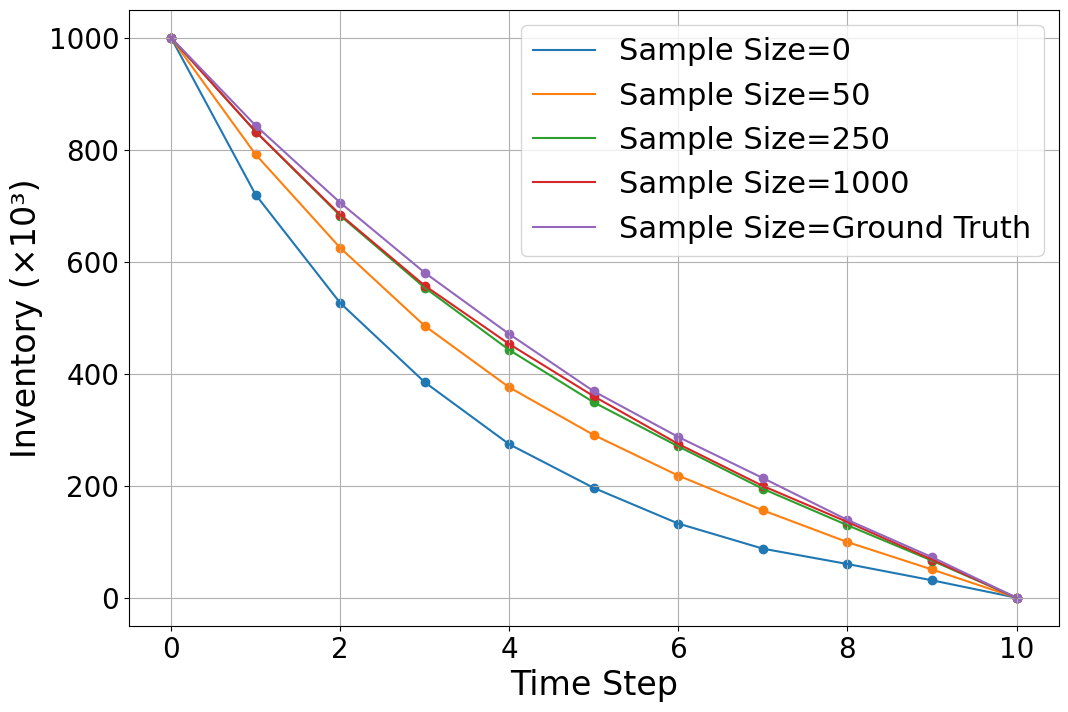

In [131]:
plt.figure(figsize=(12, 8))
time_steps = range(11)
n=24
mean_traj = delta_results[0]['mean_inventory']
plt.scatter(time_steps, mean_traj)
plt.plot(time_steps, mean_traj, label=f'Sample Size={0}')
for i in log_results.keys():
    if i != 'Point Estimate':
        mean_traj = log_results[i]['mean_inventory']
        std_traj  = log_results[i]['std_inventory']
        upper_bound = mean_traj + std_traj
        lower_bound = mean_traj - std_traj
        plt.scatter(time_steps, mean_traj)
        plt.plot(time_steps, mean_traj, label=f'Sample Size={i}')
        #plt.fill_between(time_steps, lower_bound, upper_bound, alpha=0.2)
mean_traj = delta_results['Ground Truth']['mean_inventory']
plt.scatter(time_steps, mean_traj)
plt.plot(time_steps, mean_traj, label=f'Sample Size=Ground Truth')
plt.xlabel('Time Step', fontsize = n)
plt.ylabel('Trade Size', fontsize = n)
plt.legend(loc = "best", fontsize = n-2)
plt.tick_params(axis="both", which="major", labelsize=n-4)
plt.grid(True)
ax = plt.gca()
ax.ticklabel_format(axis='y', style='plain')  # disables the 10^3 offset
ax.set_ylabel("Inventory (×10³)", fontsize=n)
plt.savefig('log_prior.pdf', bbox_inches = 'tight', pad_inches=0.05)


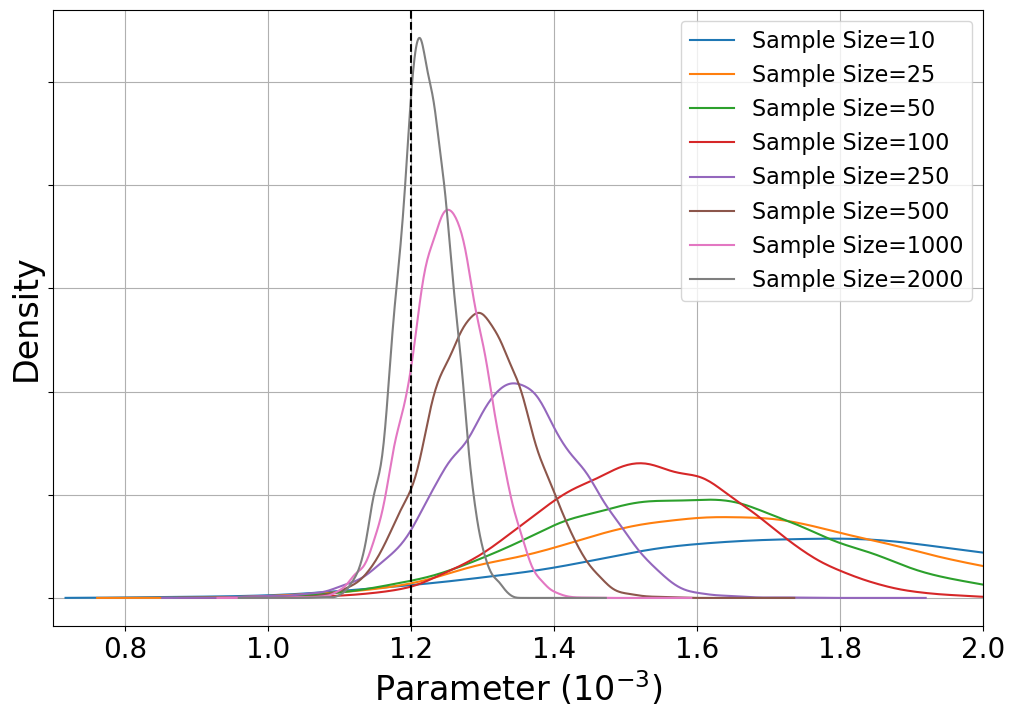

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import arviz as az


# List of trace files and their labels
trace_files = [
    "/nfs/home/colinn/Report_AC_Bayes/results_random_seed_1.2/run_20250511_005438/trace_n10_seed50.nc",
    "/nfs/home/colinn/Report_AC_Bayes/results_random_seed_1.2/run_20250511_005438/trace_n25_seed50.nc",
    "/nfs/home/colinn/Report_AC_Bayes/results_random_seed_1.2/run_20250510_182624/trace_n50_seed50.nc",
    "/nfs/home/colinn/Report_AC_Bayes/results_random_seed_1.2/run_20250510_182624/trace_n100_seed50.nc",
    "/nfs/home/colinn/Report_AC_Bayes/results_random_seed_1.2/run_20250510_182624/trace_n250_seed50.nc",
    "/nfs/home/colinn/Report_AC_Bayes/results_random_seed_1.2/run_20250510_182624/trace_n500_seed50.nc",
    "/nfs/home/colinn/Report_AC_Bayes/results_random_seed_1.2/run_20250510_182624/trace_n1000_seed50.nc",
    "/nfs/home/colinn/Report_AC_Bayes/results_random_seed_1.2/run_20250510_182624/trace_n2000_seed50.nc"
]
labels = ["Sample Size=10","Sample Size=25","Sample Size=50", "Sample Size=100", "Sample Size=250", "Sample Size=500", "Sample Size=1000", "Sample Size=2000"]

param_name = "gamma"
plt.figure(figsize=(12, 8))
i =0
for idx, trace_file in enumerate(trace_files):
    # Load the trace
    idata = az.from_netcdf(trace_file)
    
    # Extract and flatten the posterior for the parameter
    values = idata.posterior[param_name].values.flatten()
    
    # Apply Gaussian KDE
    kde = gaussian_kde(values)
    
    # Plot over a consistent x-axis
    x = np.linspace(values.min() - 0.1 * abs(values.min()), values.max() + 0.1 * abs(values.max()), 500)
    plt.plot(x, kde(x), label=labels[i])
    i = i+1
# Plot customization
plt.xlabel('Parameter')
plt.ylabel('Density')
center = 1.2e-3
plt.xlim(center - 0.0005, center + 0.0008)
plt.grid(True)
plt.axvline(x=1.2e-3, linestyle='--', color='black')
plt.legend(loc="upper right")
plt.xlabel("Parameter ($10^{-3}$)", fontsize=n)
plt.ylabel('Density', fontsize = n)
plt.legend(loc = "best", fontsize = n-8)
plt.tick_params(axis="both", which="both",labelleft =False, labelsize=n-4)
plt.grid(True)
ax = plt.gca()
#ax.set_yticks([])
ax.xaxis.set_major_formatter(
ticker.FuncFormatter(lambda x, pos: f"{x*1e3:.1f}")
)
plt.savefig('log_post.pdf', bbox_inches = 'tight', pad_inches=0.05)

